In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import autocorrect
import emoji
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [7]:
df = pd.read_csv(r"D:\Machine Learning Nagaraju\combined_file__.csv")

In [9]:
df

,Review
0,Sound quality - 4/5\nBass - 5/5\nMic - 4/5\nCo...
1,Rating it after 1 month of use...\nLook - prem...
2,Best TWS in this price range the features are ...
3,nice quality
4,Super product and battery life is awesome. Buy...
...,...
222,Nice quality sound
223,Received the product yesterday. The sound mids...
224,The media could not be loaded.\n ...
225,Pros1. Sound quality - music lovers can go boa...


In [11]:
df['Review']

0      Sound quality - 4/5\nBass - 5/5\nMic - 4/5\nCo...
1      Rating it after 1 month of use...\nLook - prem...
2      Best TWS in this price range the features are ...
3                                           nice quality
4      Super product and battery life is awesome. Buy...
                             ...                        
222                                   Nice quality sound
223    Received the product yesterday. The sound mids...
224    The media could not be loaded.\n              ...
225    Pros1. Sound quality - music lovers can go boa...
226    I bought them in Apr 2024 for around 1.6k. The...
Name: Review, Length: 227, dtype: object

```python
def text_preprocess(text):
    speller = autocorrect.Speller()
    stem = PorterStemmer()
    lemma = WordNetLemmatizer()
    
    
    text = text.lower() #Converting to lower case for uniformity
    text = speller.autocorrect_sentence(text) #Correcting the spellings
    text = emoji.demojize(text).replace(':',' ') #Predicting the emojis
    text = re.sub(r'www.\S+|https?://\S+',' ',text) #Replacing the URLS
    text = re.sub(r"[^a-zA-Z0-9']",' ',text)#Removing the punctuation marks
    text = re.sub(r'[0-9] ','',text) #Replacing the numbers
    #text = text = ' '.join(map(lambda i: chat[i] if i in chat.keys() else i, text.split())) #Chat word prediction
    text = word_tokenize(text) #Tokenization
    text = [stem.stem(i)for i in text] #Stemming
    text = [lemma.lemmatize(i)for i in text] #Lemmatization
    text = [i for i in text if i not in stopwords.words('english') ]
   
    return text
```

In [14]:
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from autocorrect import Speller
import emoji

def text_preprocess(text):
    if not isinstance(text, str):
        return ''  # Convert non-strings to empty string
    
    speller = Speller()
    stem = PorterStemmer()
    lemma = WordNetLemmatizer()
    
    text = text.lower()  # Converting to lower case for uniformity
    text = speller.autocorrect_sentence(text)  # Correcting the spellings
    text = emoji.demojize(text).replace(':', ' ')  # Predicting the emojis
    text = re.sub(r'www.\S+|https?://\S+', ' ', text)  # Replacing the URLs
    text = re.sub(r"[^a-zA-Z0-9']", ' ', text)  # Removing the punctuation marks
    text = re.sub(r'[0-9]', '', text)  # Removing the numbers
    text = word_tokenize(text)  # Tokenization
    text = [stem.stem(i) for i in text]  # Stemming
    text = [lemma.lemmatize(i) for i in text]  # Lemmatization
    text = [i for i in text if i not in stopwords.words('english')]  # Removing stop words
    
    return ' '.join(text)  # Joining tokens back into a single string

# Apply the preprocessing function to the dataframe


In [18]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Ashfaq
[nltk_data]     Khan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [22]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\Users\Ashfaq
[nltk_data]     Khan\AppData\Roaming\nltk_data...


True

In [24]:
df['Processed_Review'] = df['Review'].apply(text_preprocess)


In [26]:
df

,Review,Processed_Review
0,Sound quality - 4/5\nBass - 5/5\nMic - 4/5\nCo...,sound qualiti bass mic comfort batteri awesom ...
1,Rating it after 1 month of use...\nLook - prem...,rate month use look premium qualiti best rang ...
2,Best TWS in this price range the features are ...,best tw thi price rang featur awesom airdop ca...
3,nice quality,nice qualiti
4,Super product and battery life is awesome. Buy...,super product batteri life awesom buy thi prod...
...,...,...
222,Nice quality sound,nice qualiti sound
223,Received the product yesterday. The sound mids...,receiv product yesterday sound mid base good e...
224,The media could not be loaded.\n ...,medium could load awesom experi kind qualiti s...
225,Pros1. Sound quality - music lovers can go boa...,pro sound qualiti music lover go boat ani doub...


In [28]:
df2 = df[['Processed_Review']]

In [30]:
df2

,Processed_Review
0,sound qualiti bass mic comfort batteri awesom ...
1,rate month use look premium qualiti best rang ...
2,best tw thi price rang featur awesom airdop ca...
3,nice qualiti
4,super product batteri life awesom buy thi prod...
...,...
222,nice qualiti sound
223,receiv product yesterday sound mid base good e...
224,medium could load awesom experi kind qualiti s...
225,pro sound qualiti music lover go boat ani doub...


In [34]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Ashfaq
[nltk_data]     Khan\AppData\Roaming\nltk_data...


True

In [36]:
from nltk.sentiment import SentimentIntensityAnalyzer
sent=SentimentIntensityAnalyzer()
sent

In [38]:
def feedback(text):
    score=sent.polarity_scores(text)['compound']
    if score>=0.1:
       return "Positive"
    elif score<=(-0.1):
        return "Negative"
    else:
        return "Neutral"

In [40]:
df2["Opinion"]=df2["Processed_Review"].apply(feedback)

In [42]:
df2.to_csv("BoAt_Nirvana_ion_final.csv")


In [44]:
df2["Opinion"].value_counts()


Opinion
Positive    198
Neutral      23
Negative      6
Name: count, dtype: int64

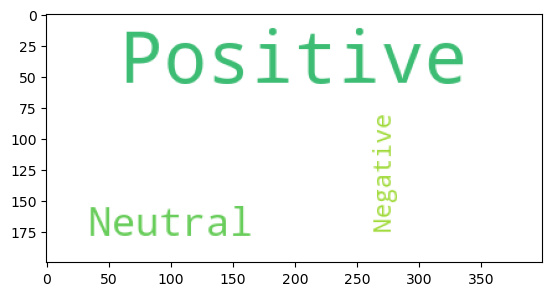

In [46]:
x=" ".join(df2["Opinion"].values)
from wordcloud import WordCloud
import matplotlib.pyplot as plt
cloud=WordCloud(background_color="white").generate(x)
plt.imshow(cloud)

<Axes: xlabel='Opinion', ylabel='count'>

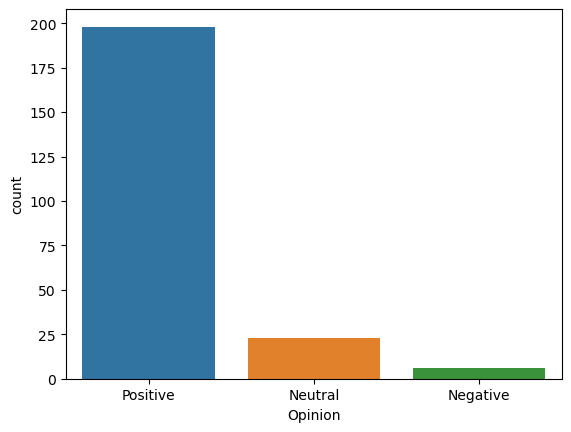

In [48]:
import seaborn as sns
sns.countplot(x=df2["Opinion"],hue=df2["Opinion"])

In [50]:
df2.loc[df2["Opinion"]=="Positive","Processed_Review"]


0      sound qualiti bass mic comfort batteri awesom ...
1      rate month use look premium qualiti best rang ...
2      best tw thi price rang featur awesom airdop ca...
3                                           nice qualiti
4      super product batteri life awesom buy thi prod...
                             ...                        
222                                   nice qualiti sound
223    receiv product yesterday sound mid base good e...
224    medium could load awesom experi kind qualiti s...
225    pro sound qualiti music lover go boat ani doub...
226    bought apr around k best tw price rang batteri...
Name: Processed_Review, Length: 198, dtype: object

In [52]:
positive_tweet=df2.loc[df2["Opinion"]=="Positive","Processed_Review"]
positive_tweet

0      sound qualiti bass mic comfort batteri awesom ...
1      rate month use look premium qualiti best rang ...
2      best tw thi price rang featur awesom airdop ca...
3                                           nice qualiti
4      super product batteri life awesom buy thi prod...
                             ...                        
222                                   nice qualiti sound
223    receiv product yesterday sound mid base good e...
224    medium could load awesom experi kind qualiti s...
225    pro sound qualiti music lover go boat ani doub...
226    bought apr around k best tw price rang batteri...
Name: Processed_Review, Length: 198, dtype: object

In [54]:
positive_words=" ".join(positive_tweet.values)
positive_words

"sound qualiti bass mic comfort batteri awesom batteri backup game close latenc design look premium app support veri basic valu money give anc balanc mode veri good signatur mode boost bass 's whi vocal troubl sound low listen balanc mode best experi sound louder listen full sound 's would suffici app support veri read rate month use look premium qualiti best rang durabl good day day use need improv hing come sound qualiti import sound awesom best bass lover love vocal n't go connect super fast open case time plug ear connect devic googl pair support app support avail updat boat wearabl app play store till singl pair read best tw thi price rang featur awesom airdop call featur poor thi superb signatur mode beast play music awesom experi touch sensor work well accur batteri backup veryold also comfort wear budget k go buy nice qualiti super product batteri life awesom buy thi product enjoy thi ha two mode super enc super call beast mode also superb thi best qualiti thi lower price sound

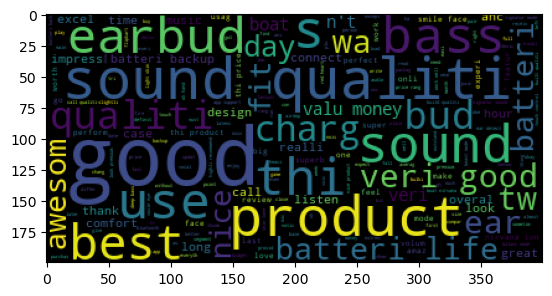

In [56]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
cloud=WordCloud().generate(positive_words)
plt.imshow(cloud)

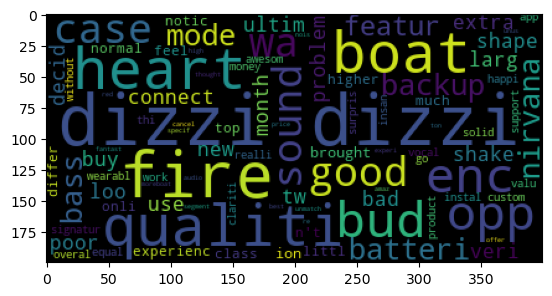

In [58]:
negative_tweet=df2.loc[df2["Opinion"]=="Negative","Processed_Review"]
negative_words=" ".join(negative_tweet.values)
cloud=WordCloud().generate(negative_words)
plt.imshow(cloud)

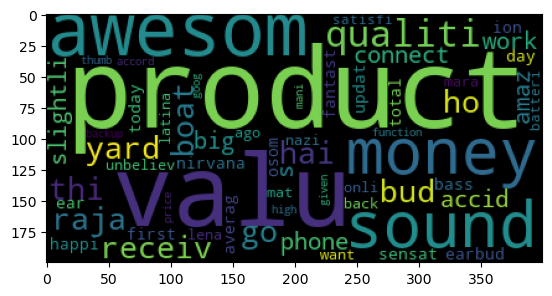

In [60]:
neutral_tweet=df2.loc[df2["Opinion"]=="Neutral","Processed_Review"]
neutral_words=" ".join(neutral_tweet.values)
cloud=WordCloud().generate(neutral_words)
plt.imshow(cloud)

# Text Vectorizatiion

In [63]:
from sklearn.feature_extraction.text import CountVectorizer
Bagw=CountVectorizer(stop_words="english")

In [65]:
df2.columns


Index(['Processed_Review', 'Opinion'], dtype='object')

In [67]:
df2

,Processed_Review,Opinion
0,sound qualiti bass mic comfort batteri awesom ...,Positive
1,rate month use look premium qualiti best rang ...,Positive
2,best tw thi price rang featur awesom airdop ca...,Positive
3,nice qualiti,Positive
4,super product batteri life awesom buy thi prod...,Positive
...,...,...
222,nice qualiti sound,Positive
223,receiv product yesterday sound mid base good e...,Positive
224,medium could load awesom experi kind qualiti s...,Positive
225,pro sound qualiti music lover go boat ani doub...,Positive


In [69]:
x=df2.drop(["Opinion"],axis=1)
y=df2["Opinion"]

In [71]:
Bagw.fit_transform(x["Processed_Review"]).toarray()



array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [73]:
import pickle
pickle.dump(Bagw,open("Bagw_vectorization.pkl","wb"))
vect=pickle.load(open("Bagw_vectorization.pkl","rb"))
vect

CountVectorizer(stop_words='english')

In [75]:
X=pd.DataFrame(Bagw.fit_transform(x["Processed_Review"]).toarray(),columns=Bagw.get_feature_names_out())
X

,ab,abl,abov,abruptli,absolut,accept,accessori,accid,accord,accur,...,worth,wow,write,written,ya,yard,yeah,yesterday,youth,youtub
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
223,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
224,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
225,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=23)


In [79]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
NB=MultinomialNB()
NB.fit(X_train,y_train)
y_pred=NB.predict(X_test)
#accuracy_score(y_test,y_pred)

In [81]:
X_test

,ab,abl,abov,abruptli,absolut,accept,accessori,accid,accord,accur,...,worth,wow,write,written,ya,yard,yeah,yesterday,youth,youtub
55,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
128,0,0,0,0,0,2,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
121,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
76,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Logistic Regression

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
Logr=LogisticRegression()
Logr.fit(X_train,y_train)
y_pred=Logr.predict(X_test)
accuracy_score(y_test,y_pred)

0.9565217391304348

In [86]:
df2["Processed_Review"].loc[10]

'case premium overal tw good invest anc app support miss call premium bud boat balanc mode also averag bass mode signatur mode veri good special bass lover batteri awesom overal good deal'

In [88]:
def  mail_tester(email):
    data = Bagw.transform([email]).toarray()
    return Logr.predict(data)[0]

In [90]:
mail_tester("bad")


'Neutral'

In [92]:
import pickle
pickle.dump(Logr,open("BoAt_Nirvana.pkl","wb"))
model=pickle.load(open("BoAt_Nirvana.pkl","rb"))
model

LogisticRegression()